In [41]:
import pandas as pd

# Ruta al archivo CSV local
#ruta_archivo = r"C:\Users\Administrador\Documents\Oficina\ARTURO\Maestría_2022\TFM\per_39_solo.csv"
# Ruta al archivo CSV en githhub
ruta_archivo = "https://raw.github.com/ArturoEscobar1984/TFM_ARTURO_ESCOBAR/main/Data/per_39_solo.csv"


In [42]:
# Define una función de conversión para cedula_alu que lo convierta en string
def convert_to_str(value):
    return str(value)

# Leer el archivo CSV y especificar el tipo de dato para cedula_alu usando el parámetro dtype
# También especifica las columnas que se deben parsear como fechas usando el parámetro parse_dates
df = pd.read_csv(ruta_archivo, delimiter=';', encoding='latin1', dtype={'cedula_alu': str}, parse_dates=['dtFecha_log', 'FNAC_ALU'])
df.rename(columns={'estudiante': 'first_name'}, inplace=True)

In [7]:
%pip install --upgrade pip
%pip install cape-privacy==0.3.0 --no-deps
%pip install anonympy

from anonympy.pandas import dfAnonymizer
anonym = dfAnonymizer(df)

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Muestra los tipos de datos de cada columna
#print(tipos_de_datos)

print("Variables numericas: ")
print(anonym.numeric_columns)
print("Variables categoricas: ")
print(anonym.categorical_columns)
print("Variables Fecha: ")
print(anonym.datetime_columns)


Variables numericas: 
['CEDULA_ALU', 'intCod_nivel', 'intRepeticion_matric', 'decValorPagar_matric', 'strEstructuraHogar_Ficha', 'intFamiliares_Ficha', 'BONODH', 'strTipoVivienda_Ficha', 'decIngresoFam_Ficha', 'decEgresoFam_Ficha', 'Trabaja', 'Empresa', 'strDirEmpresa_Ficha', 'strTlfEmp_Ficha', 'strCelEmp_Ficha', 'strMailEmp_Ficha', 'strSBTelefono_Ficha']
Variables categoricas: 
['first_name', 'strCod_Sede', 'strCod_Fac', 'strNombre_Car', 'strCod_malla', 'strEstado_matric', 'strTipo_matric', 'strCaso_matric', 'strTenenciaVivienda_Ficha', 'strFinanciaEstudios_Ficha', 'strFinanciaEstudios_Ficha.1', 'EdPadre', 'OcupaPadre', 'EdMadre', 'OcupaMadre', 'Ub_Empresa', 'strPolitica_Ficha', 'strNombre_col', 'strSostenimiento_col', 'strSBLuz_Ficha', 'strSBAgua_Ficha', 'strSBAlcatarillado_Ficha', 'strSBInternet_Ficha', 'strSBCable_Ficha', 'strPC_Ficha', 'strTablet_Ficha', 'strLaptop_Ficha', 'strCellPhone_Ficha', 'strOtraCarrera_Ficha', 'QUINTIL', 'OBS1_ALU', 'OBS2_ALU']
Variables Fecha: 
['dtFecha_

In [44]:
# Contar los valores nulos por columna
valores_nulos = df.isnull().sum()

# Filtrar las columnas que tienen valores nulos
columnas_con_nulos = valores_nulos[valores_nulos == 9160]

# Mostrar las columnas con sus respectivos conteos de valores nulos
print(columnas_con_nulos)

strEstructuraHogar_Ficha    9160
BONODH                      9160
strTipoVivienda_Ficha       9160
Trabaja                     9160
Empresa                     9160
strDirEmpresa_Ficha         9160
strTlfEmp_Ficha             9160
strCelEmp_Ficha             9160
strMailEmp_Ficha            9160
strSBTelefono_Ficha         9160
dtype: int64


In [45]:
valores_nulos = df.isnull().sum()
columnas_completamente_nulas = valores_nulos[valores_nulos == 9160].index
df = df.drop(columns=columnas_completamente_nulas)
print(df.shape)



(9160, 41)


In [46]:
valores_nulos = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print(columnas_con_nulos)


intFamiliares_Ficha              63
strTenenciaVivienda_Ficha        63
decIngresoFam_Ficha              63
decEgresoFam_Ficha               63
strFinanciaEstudios_Ficha        63
strFinanciaEstudios_Ficha.1      63
EdPadre                          63
OcupaPadre                       63
EdMadre                          63
OcupaMadre                       63
Ub_Empresa                       63
strPolitica_Ficha                63
strNombre_col                    63
strSostenimiento_col             63
strSBLuz_Ficha                   63
strSBAgua_Ficha                  63
strSBAlcatarillado_Ficha         63
strSBInternet_Ficha              63
strSBCable_Ficha                 63
strPC_Ficha                      63
strTablet_Ficha                  63
strLaptop_Ficha                  63
strCellPhone_Ficha               63
strOtraCarrera_Ficha           5804
QUINTIL                          63
dtFecha_log                      63
dtype: int64


In [47]:
# Crear un diccionario con los valores por defecto para cada columna
valores_por_defecto = {
    'intFamiliares_Ficha': 0,
    'strTenenciaVivienda_Ficha': 'SIN DATOS',
    'decIngresoFam_Ficha': 0,
    'decEgresoFam_Ficha': 0,
    'strFinanciaEstudios_Ficha': 'SIN DATOS',
    'strFinanciaEstudios_Ficha.1': 'SIN DATOS',
    'EdPadre': 'SIN DATOS',
    'OcupaPadre': 'SIN DATOS',
    'EdMadre': 'SIN DATOS',
    'OcupaMadre': 'SIN DATOS',
    'Ub_Empresa': 'SIN DATOS',
    'strPolitica_Ficha': 'SIN DATOS',
    'strNombre_col': 'SIN DATOS',
    'strSostenimiento_col': 'SIN DATOS',
    'strSBLuz_Ficha': 'SIN DATOS',
    'strSBAgua_Ficha': 'SIN DATOS',
    'strSBAlcatarillado_Ficha': 'SIN DATOS',
    'strSBInternet_Ficha': 'SIN DATOS',
    'strSBCable_Ficha': 'SIN DATOS',
    'strPC_Ficha': 'SIN DATOS',
    'strTablet_Ficha': 'SIN DATOS',
    'strLaptop_Ficha': 'SIN DATOS',
    'strCellPhone_Ficha': 'SIN DATOS',
    'strOtraCarrera_Ficha': 'SIN DATOS',
    'QUINTIL': 'Q1',
    'dtFecha_log': pd.Timestamp.now()
}

# Rellenar valores nulos con los valores especificados
df = df.fillna(value=valores_por_defecto)

# Mostrar el DataFrame resultante
print(df.head())


   CEDULA_ALU                     first_name strCod_Sede strCod_Fac  \
0   502240344      MARIA ANGELICA GILER VERA       EMANA      CAREN   
1   504318122   MAYRA YAJAIRA VEGA LATACUNGA       EMANA      CAREN   
2   504142381    GENESIS ROXANA GUANINA ANTE       EMANA      CAREN   
3  1250358213      IVAN JOSE PARRAGA PAZMIÑO       EMANA      CAREN   
4  1206889162  LUIS JONAINER ARTEAGA HERRERA       EMANA      CAREN   

  strNombre_Car           strCod_malla  intCod_nivel strEstado_matric  \
0     AGRONOMÍA  M6_EMANA_CAREN_LMIAGR             1              DEF   
1     AGRONOMÍA  M6_EMANA_CAREN_LMIAGR             1              DEF   
2     AGRONOMÍA  M6_EMANA_CAREN_LMIAGR             1              DEF   
3     AGRONOMÍA  M6_EMANA_CAREN_LMIAGR             1              DEF   
4     AGRONOMÍA  M6_EMANA_CAREN_LMIAGR             1              DEF   

  strTipo_matric  intRepeticion_matric  ...  strPC_Ficha strTablet_Ficha  \
0      ORDINARIA                     1  ...           SI  

In [48]:
valores_nulos = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print(columnas_con_nulos)


Series([], dtype: int64)


In [49]:
# Convertir la columna 'CEDULA_ALU' a tipo 'string'
df['CEDULA_ALU'] = df['CEDULA_ALU'].astype(str)

In [50]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)


CEDULA_ALU                             object
first_name                             object
strCod_Sede                            object
strCod_Fac                             object
strNombre_Car                          object
strCod_malla                           object
intCod_nivel                            int64
strEstado_matric                       object
strTipo_matric                         object
intRepeticion_matric                    int64
decValorPagar_matric                  float64
strCaso_matric                         object
intFamiliares_Ficha                   float64
strTenenciaVivienda_Ficha              object
decIngresoFam_Ficha                   float64
decEgresoFam_Ficha                    float64
strFinanciaEstudios_Ficha              object
strFinanciaEstudios_Ficha.1            object
EdPadre                                object
OcupaPadre                             object
EdMadre                                object
OcupaMadre                        

In [51]:
# Eliminar múltiples columnas
columnas_a_eliminar = ['first_name', 'strCod_malla','strEstado_matric','strTipo_matric','intRepeticion_matric','strCaso_matric'
                       ,'strFinanciaEstudios_Ficha.1','Ub_Empresa','strNombre_col','strOtraCarrera_Ficha','dtFecha_log','FNAC_ALU','OBS1_ALU','OBS2_ALU']
df = df.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame resultante
print("\nDataFrame después de eliminar columnas irrelevantes:")
print(df)



DataFrame después de eliminar columnas irrelevantes:
      CEDULA_ALU strCod_Sede strCod_Fac            strNombre_Car  \
0      502240344       EMANA      CAREN                AGRONOMÍA   
1      504318122       EMANA      CAREN                AGRONOMÍA   
2      504142381       EMANA      CAREN                AGRONOMÍA   
3     1250358213       EMANA      CAREN                AGRONOMÍA   
4     1206889162       EMANA      CAREN                AGRONOMÍA   
...          ...         ...        ...                      ...   
9155  1726301821        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9156  1754447959        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9157  1850105741        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9158   504044017        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9159   503448763        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   

      intCod_nivel  decValorPagar_matric  intFamiliares_Ficha  \
0                1                   0.0                  0.0   

In [52]:
tipos_de_datos = df.dtypes
print (tipos_de_datos)
print (df.shape)


CEDULA_ALU                    object
strCod_Sede                   object
strCod_Fac                    object
strNombre_Car                 object
intCod_nivel                   int64
decValorPagar_matric         float64
intFamiliares_Ficha          float64
strTenenciaVivienda_Ficha     object
decIngresoFam_Ficha          float64
decEgresoFam_Ficha           float64
strFinanciaEstudios_Ficha     object
EdPadre                       object
OcupaPadre                    object
EdMadre                       object
OcupaMadre                    object
strPolitica_Ficha             object
strSostenimiento_col          object
strSBLuz_Ficha                object
strSBAgua_Ficha               object
strSBAlcatarillado_Ficha      object
strSBInternet_Ficha           object
strSBCable_Ficha              object
strPC_Ficha                   object
strTablet_Ficha               object
strLaptop_Ficha               object
strCellPhone_Ficha            object
QUINTIL                       object
d

<h1>Estadistica descriptiva </h1>

In [53]:
# Resumen estadístico
print(df.describe(include='all'))


       CEDULA_ALU strCod_Sede strCod_Fac strNombre_Car  intCod_nivel  \
count        9160        9160       9160          9160   9160.000000   
unique       9158           3          4            30           NaN   
top     923986954        MUTC       CCHH     AGRONOMÍA           NaN   
freq            2        6427       2554           606           NaN   
mean          NaN         NaN        NaN           NaN      4.921179   
std           NaN         NaN        NaN           NaN      2.486849   
min           NaN         NaN        NaN           NaN      1.000000   
25%           NaN         NaN        NaN           NaN      3.000000   
50%           NaN         NaN        NaN           NaN      5.000000   
75%           NaN         NaN        NaN           NaN      7.000000   
max           NaN         NaN        NaN           NaN     10.000000   

        decValorPagar_matric  intFamiliares_Ficha strTenenciaVivienda_Ficha  \
count            9160.000000               9160.0       

In [54]:
# Contar los registros por cada categoría
conteo_categorias = df['QUINTIL'].value_counts()

# Convertir el conteo a DataFrame
conteo_df = conteo_categorias.to_frame().reset_index()
conteo_df.columns = ['Categoria', 'Conteo']

# Agregar una fila para el total
total = conteo_df['Conteo'].sum()
total_df = pd.DataFrame({'Categoria': ['Total'], 'Conteo': [total]})

# Concatenar el DataFrame de conteos con la fila de total
resultado_df = pd.concat([conteo_df, total_df], ignore_index=True)

# Mostrar el DataFrame resultante con los totales
print("\nConteo de registros por categoría con total:")
print(resultado_df)




Conteo de registros por categoría con total:
  Categoria  Conteo
0        Q1    5956
1        Q2    2582
2        Q3     450
3        Q4      89
4        Q5      83
5     Total    9160


In [ ]:
#Convertir la variable categorica ordinal QUINTIL a Numérica 
# Diccionario de mapeo
mapeo_quintil = {
    'Q1': 1,
    'Q2': 2,
    'Q3': 3,
    'Q4': 4,
    'Q5': 5
}


# Convertir los valores de 'quintil' a números
df['QUINTIL'] = df['QUINTIL'].map(mapeo_quintil)

# Mostrar el DataFrame resultante
print("\nDataFrame después de la conversión:")
print(df)

# Contar los registros por cada categoría
conteo_categorias = df['QUINTIL'].value_counts()

# Convertir el conteo a DataFrame
conteo_df = conteo_categorias.to_frame().reset_index()
conteo_df.columns = ['Categoria', 'Conteo']

# Agregar una fila para el total
total = conteo_df['Conteo'].sum()
total_df = pd.DataFrame({'Categoria': ['Total'], 'Conteo': [total]})

# Concatenar el DataFrame de conteos con la fila de total
resultado_df = pd.concat([conteo_df, total_df], ignore_index=True)

# Mostrar el DataFrame resultante con los totales
print("\nConteo de registros por categoría con total:")
print(resultado_df)




In [59]:
# Filtrar los datos donde 'quintil' es 'Q1' y 'dec_valoringreso' es 0
filtro = (df['QUINTIL']) & (df['decIngresoFam_Ficha'] == 0)

# Contar los registros que cumplen con las condiciones
conteo = df.loc[filtro].shape[0]

# Mostrar el conteo
print("\nNúmero de registros donde 'quintil' es 'Q1' y 'decIngresoFam_Ficha' es 0:")
print(conteo)


# Filtrar los datos donde 'dec_valoringreso' es 0
filtro = df[df['decIngresoFam_Ficha'] == 0]

# Contar los registros por cada categoría de 'quintil'
conteo_categorias = filtro.groupby('QUINTIL').size()

# Mostrar el conteo de cada categoría
print("\nConteo de registros por categoría donde 'decIngresoFam_Ficha' es 0:")
print(conteo_categorias)




Número de registros donde 'quintil' es 'Q1' y 'decIngresoFam_Ficha' es 0:
205

Conteo de registros por categoría donde 'decIngresoFam_Ficha' es 0:
QUINTIL
1    205
dtype: int64


In [60]:
# Condición para identificar los registros donde 'dec_valoringreso' es 0
condicion = df['decIngresoFam_Ficha'] == 0

# Cambiar los valores de 'quintil' a 0 donde la condición se cumple
df.loc[condicion, 'QUINTIL'] = 0

# Mostrar el DataFrame resultante
print("\nDataFrame después de modificar 'quintil' cuando 'dec_valoringreso' es 0:")
print(df)



DataFrame después de modificar 'quintil' cuando 'dec_valoringreso' es 0:
      CEDULA_ALU strCod_Sede strCod_Fac            strNombre_Car  \
0      502240344       EMANA      CAREN                AGRONOMÍA   
1      504318122       EMANA      CAREN                AGRONOMÍA   
2      504142381       EMANA      CAREN                AGRONOMÍA   
3     1250358213       EMANA      CAREN                AGRONOMÍA   
4     1206889162       EMANA      CAREN                AGRONOMÍA   
...          ...         ...        ...                      ...   
9155  1726301821        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9156  1754447959        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9157  1850105741        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9158   504044017        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9159   503448763        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   

      intCod_nivel  decValorPagar_matric  intFamiliares_Ficha  \
0                1                   0.0    

In [66]:
# Contar los registros por cada categoría
conteo_categorias = df['QUINTIL'].value_counts()

# Convertir el conteo a DataFrame
conteo_df = conteo_categorias.to_frame().reset_index()
conteo_df.columns = ['Categoria', 'Conteo']

# Ordenar el DataFrame por categoría
conteo_df = conteo_df.sort_values(by='Categoria')

# Agregar una fila para el total
total = conteo_df['Conteo'].sum()
total_df = pd.DataFrame({'Categoria': ['Total'], 'Conteo': [total]})

# Concatenar el DataFrame de conteos con la fila de total
resultado_df = pd.concat([conteo_df, total_df], ignore_index=True)

# Mostrar el DataFrame resultante con los totales
print("\nConteo de registros por categoría con total:")
print(resultado_df)





Conteo de registros por categoría con total:
  Categoria  Conteo
0         0     205
1         1    5751
2         2    2582
3         3     450
4         4      89
5         5      83
6     Total    9160


<h1>DETECTAR QUINTILES MAL UBICADOS</h1>

In [67]:
# Definir las condiciones para los quintiles
condiciones = [
    (df['decIngresoFam_Ficha'] == 0),
    (df['decIngresoFam_Ficha'] > 0) & (df['decIngresoFam_Ficha'] <= 400),
    (df['decIngresoFam_Ficha'] > 400) & (df['decIngresoFam_Ficha'] <= 800),
    (df['decIngresoFam_Ficha'] > 800) & (df['decIngresoFam_Ficha'] <= 1200),
    (df['decIngresoFam_Ficha'] > 1200) & (df['decIngresoFam_Ficha'] <= 1600),
    (df['decIngresoFam_Ficha'] >= 1600)
]

# Asignar los valores de quintil correspondientes
valores_quintil = [0, 1, 2, 3, 4, 5]

# Crear una nueva columna 'quintil_correcto' con los valores asignados
df['quintil_correcto'] = pd.cut(df['decIngresoFam_Ficha'], bins=[-1, 0, 400, 800, 1200, 1600, float('inf')], labels=[0, 1, 2, 3, 4, 5])

# Convertir 'quintil_correcto' a entero
df['quintil_correcto'] = df['quintil_correcto'].astype(int)

# Mostrar el DataFrame con la nueva columna
print("\nDataFrame con la columna 'quintil_correcto':")
print(df)



DataFrame con la columna 'quintil_correcto':
      CEDULA_ALU strCod_Sede strCod_Fac            strNombre_Car  \
0      502240344       EMANA      CAREN                AGRONOMÍA   
1      504318122       EMANA      CAREN                AGRONOMÍA   
2      504142381       EMANA      CAREN                AGRONOMÍA   
3     1250358213       EMANA      CAREN                AGRONOMÍA   
4     1206889162       EMANA      CAREN                AGRONOMÍA   
...          ...         ...        ...                      ...   
9155  1726301821        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9156  1754447959        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9157  1850105741        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9158   504044017        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   
9159   503448763        MUTC       CIYA  SISTEMAS DE INFORMACIÓN   

      intCod_nivel  decValorPagar_matric  intFamiliares_Ficha  \
0                1                   0.0                  0.0   
1      

In [68]:
# Identificar los registros donde 'QUINTIL' no coincide con 'quintil_correcto'
registros_mal_ubicados = df[df['QUINTIL'] != df['quintil_correcto']]

# Mostrar los registros mal ubicados
print("\nRegistros mal ubicados:")
print(registros_mal_ubicados)



Registros mal ubicados:
Empty DataFrame
Columns: [CEDULA_ALU, strCod_Sede, strCod_Fac, strNombre_Car, intCod_nivel, decValorPagar_matric, intFamiliares_Ficha, strTenenciaVivienda_Ficha, decIngresoFam_Ficha, decEgresoFam_Ficha, strFinanciaEstudios_Ficha, EdPadre, OcupaPadre, EdMadre, OcupaMadre, strPolitica_Ficha, strSostenimiento_col, strSBLuz_Ficha, strSBAgua_Ficha, strSBAlcatarillado_Ficha, strSBInternet_Ficha, strSBCable_Ficha, strPC_Ficha, strTablet_Ficha, strLaptop_Ficha, strCellPhone_Ficha, QUINTIL, quintil_correcto]
Index: []

[0 rows x 28 columns]


In [71]:
import os

# Guardar el DataFrame en un archivo CSV en la carpeta "Documentos"
ruta_documentos = os.path.expanduser('~/Documents/datasetfinal.csv')
df.to_csv(ruta_documentos, index=False)

print(f"Archivo guardado en: {ruta_documentos}")

Archivo guardado en: C:\Users\Administrador/Documents/datasetfinal.csv


In [72]:
# Obtener estadísticas descriptivas
estadisticas_descriptivas = df.describe(include='all')
estadisticas_descriptivas

,CEDULA_ALU,strCod_Sede,strCod_Fac,strNombre_Car,intCod_nivel,decValorPagar_matric,intFamiliares_Ficha,strTenenciaVivienda_Ficha,decIngresoFam_Ficha,decEgresoFam_Ficha,...,strSBAgua_Ficha,strSBAlcatarillado_Ficha,strSBInternet_Ficha,strSBCable_Ficha,strPC_Ficha,strTablet_Ficha,strLaptop_Ficha,strCellPhone_Ficha,QUINTIL,quintil_correcto
count,9160,9160,9160,9160,9160.000000,9160.000000,9160.0,9160,9160.000000,9160.0,...,9160,9160,9160,9160,9160,9160,9160,9160,9160.000000,9160.000000
unique,9158,3,4,30,NaN,NaN,NaN,4,NaN,NaN,...,5,3,3,3,3,3,3,3,NaN,NaN
top,923986954,MUTC,CCHH,AGRONOMÍA,NaN,NaN,NaN,PROPIA,NaN,NaN,...,POTABLE,SI,SI,NO,NO,NO,SI,SI,NaN,NaN
freq,2,6427,2554,606,NaN,NaN,NaN,6273,NaN,NaN,...,7971,6659,7922,7767,6051,8726,5637,8878,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.921179,19.150443,0.0,NaN,395.738319,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.423144,1.423144
std,NaN,NaN,NaN,NaN,2.486849,55.962141,0.0,NaN,382.456992,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.744444,0.744444
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.0,NaN,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,0.0,NaN,200.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,5.000000,0.000000,0.0,NaN,380.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,7.000000,0.000000,0.0,NaN,500.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000


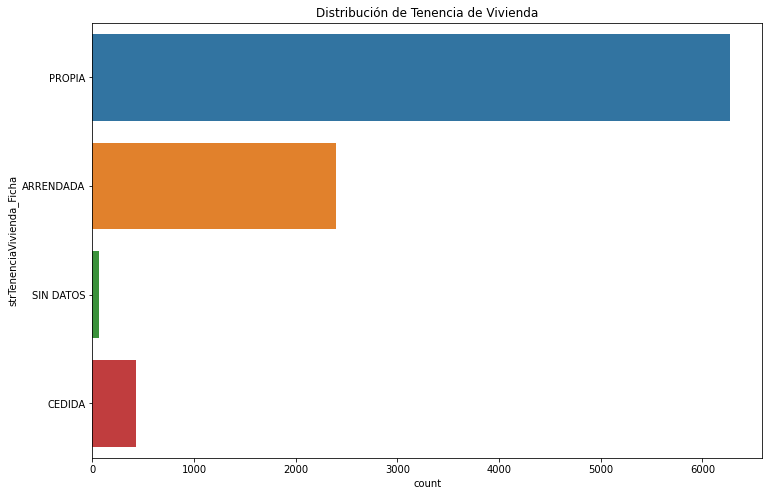

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de las variables categóricas
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='strTenenciaVivienda_Ficha')
plt.title('Distribución de Tenencia de Vivienda')
plt.show()


<AxesSubplot:xlabel='QUINTIL'>

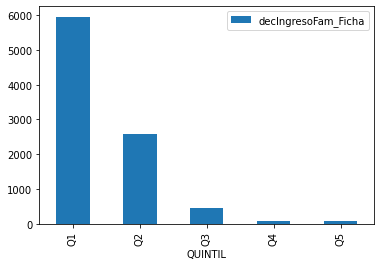

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby('QUINTIL')['decIngresoFam_Ficha'].count().plot(kind='bar',legend='reverse')

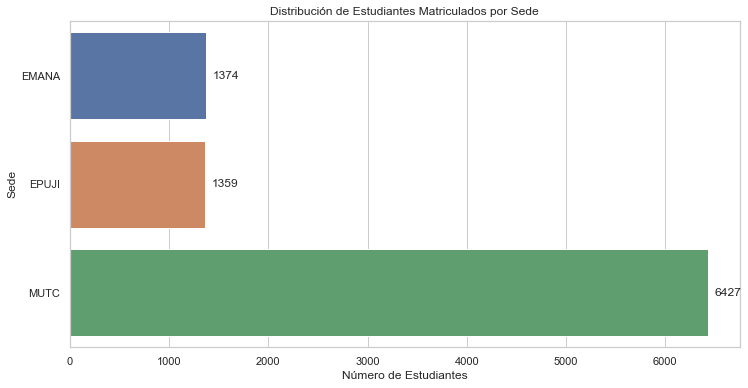

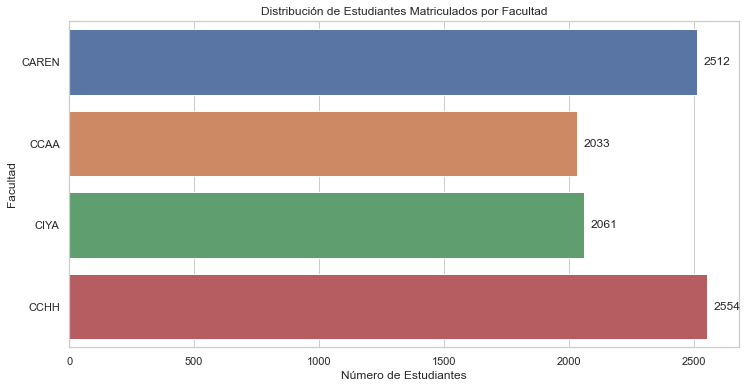

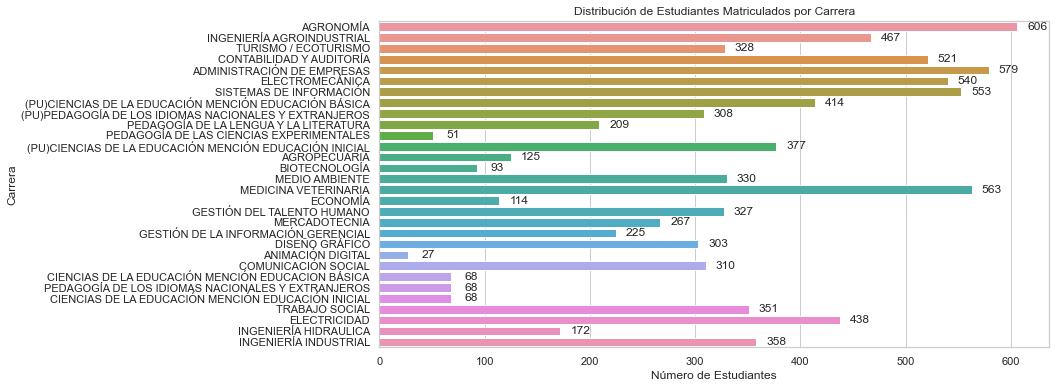

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo de los gráficos
sns.set(style="whitegrid")

# Distribución de estudiantes matriculados por sede
plt.figure(figsize=(12, 6))
sede_plot = sns.countplot(data=df, y='strCod_Sede')
sede_plot.set_title('Distribución de Estudiantes Matriculados por Sede')
sede_plot.set_xlabel('Número de Estudiantes')
sede_plot.set_ylabel('Sede')
# Añadir etiquetas
for p in sede_plot.patches:
    sede_plot.annotate(format(p.get_width(), '.0f'), 
                       (p.get_width(), p.get_y() + p.get_height() / 2), 
                       ha = 'center', va = 'center', 
                       xytext = (20, 0), 
                       textcoords = 'offset points')
plt.show()

# Distribución de estudiantes matriculados por facultad
plt.figure(figsize=(12, 6))
facultad_plot = sns.countplot(data=df, y='strCod_Fac')
facultad_plot.set_title('Distribución de Estudiantes Matriculados por Facultad')
facultad_plot.set_xlabel('Número de Estudiantes')
facultad_plot.set_ylabel('Facultad')
# Añadir etiquetas
for p in facultad_plot.patches:
    facultad_plot.annotate(format(p.get_width(), '.0f'), 
                           (p.get_width(), p.get_y() + p.get_height() / 2), 
                           ha = 'center', va = 'center', 
                           xytext = (20, 0), 
                           textcoords = 'offset points')
plt.show()

# Distribución de estudiantes matriculados por carrera
plt.figure(figsize=(12, 6))
carrera_plot = sns.countplot(data=df, y='strNombre_Car')
carrera_plot.set_title('Distribución de Estudiantes Matriculados por Carrera')
carrera_plot.set_xlabel('Número de Estudiantes')
carrera_plot.set_ylabel('Carrera')
# Añadir etiquetas
for p in carrera_plot.patches:
    carrera_plot.annotate(format(p.get_width(), '.0f'), 
                          (p.get_width(), p.get_y() + p.get_height() / 2), 
                          ha = 'center', va = 'center', 
                          xytext = (20, 0), 
                          textcoords = 'offset points')
plt.show()


<h1>Promedio  de estudiantes por facultad</h1>

In [83]:


# Calcular el número de estudiantes matriculados por facultad
matriculados_por_facultad = df['strCod_Fac'].value_counts()

# Calcular el promedio de estudiantes matriculados por facultad
promedio_matriculados_por_facultad = matriculados_por_facultad.mean()
print(f'Promedio de estudiantes matriculados por facultad: {promedio_matriculados_por_facultad}')


Promedio de estudiantes matriculados por facultad: 2290.0


<Figure size 864x432 with 0 Axes>

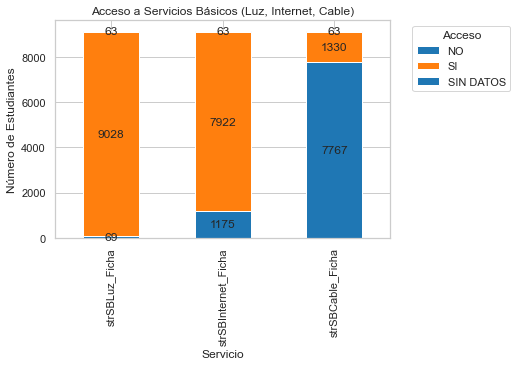

In [86]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con la información de acceso a servicios básicos (excepto agua)
servicios_basicos = df[['strSBLuz_Ficha', 'strSBInternet_Ficha', 'strSBCable_Ficha']]

# Contar el número de accesos a cada servicio (SI y NO)
servicios_basicos_count = servicios_basicos.apply(pd.Series.value_counts).fillna(0)

# Crear un gráfico de barras apiladas para mostrar el acceso a servicios básicos
plt.figure(figsize=(12, 6))
ax = servicios_basicos_count.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Acceso a Servicios Básicos (Luz, Internet, Cable)')
plt.xlabel('Servicio')
plt.ylabel('Número de Estudiantes')
plt.legend(title='Acceso', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


<h1>Servicio básico Agua </h1>

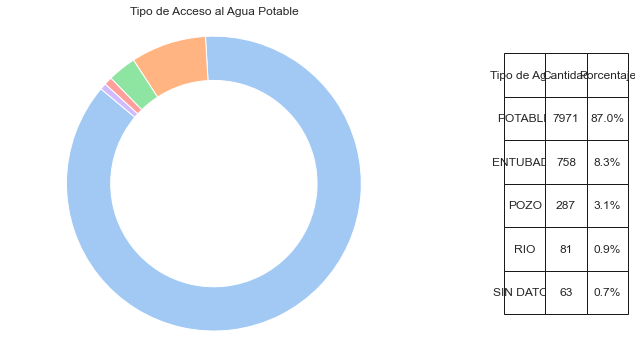

In [117]:

# Contar el tipo de acceso al agua potable
tipos_agua = df['strSBAgua_Ficha'].value_counts()

# Crear un gráfico de tarta para el tipo de acceso al agua potable
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de tarta sin etiquetas
wedges, texts = ax.pie(
    tipos_agua.values, 
    startangle=140, 
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(width=0.3)
)

# Crear una tabla con los valores
table_data = pd.DataFrame({
    'Tipo de Agua': tipos_agua.index,
    'Cantidad': tipos_agua.values,
    'Porcentaje': [f'{x:.1f}%' for x in (tipos_agua.values / tipos_agua.sum() * 100)]
})

# Añadir la tabla a la derecha del gráfico de tarta
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='right', bbox=[1.2, 0.1, 0.3, 0.8],colWidths=[2,2,2,2])

# Ajustar el tamaño del texto en la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Tipo de Acceso al Agua Potable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.subplots_adjust(right=0.7)

plt.show()


<h1>Acceso a la tecnología</h1>

<Figure size 864x432 with 0 Axes>

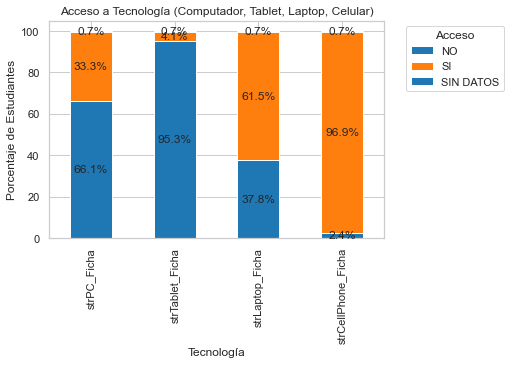

In [118]:
# Crear un DataFrame con la información de acceso a tecnología
tecnologia = df[['strPC_Ficha', 'strTablet_Ficha', 'strLaptop_Ficha', 'strCellPhone_Ficha']]

# Contar el número de accesos a cada tecnología (SI y NO)
tecnologia_count = tecnologia.apply(pd.Series.value_counts).fillna(0)

# Calcular los porcentajes
tecnologia_percent = tecnologia_count.div(tecnologia_count.sum(axis=0), axis=1) * 100

# Crear un gráfico de barras apiladas para mostrar el acceso a tecnología
plt.figure(figsize=(12, 6))
ax = tecnologia_percent.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Acceso a Tecnología (Computador, Tablet, Laptop, Celular)')
plt.xlabel('Tecnología')
plt.ylabel('Porcentaje de Estudiantes')
plt.legend(title='Acceso', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

<h1>financiamiento de estudios</h1>

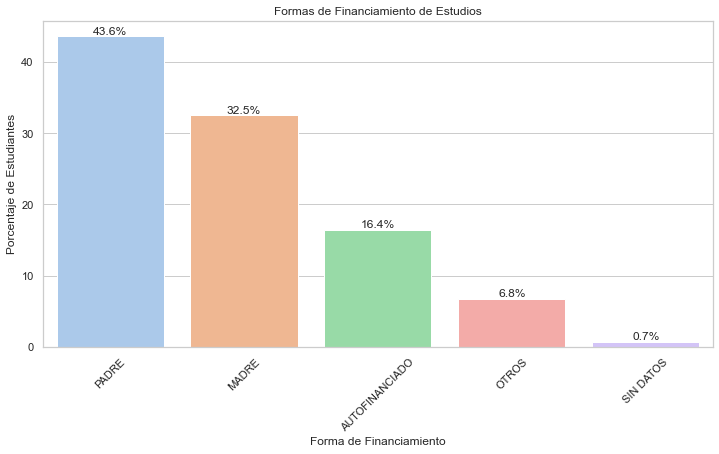

In [120]:
# Contar el número de registros para cada valor en el campo 'strFinanciaEstudios_Ficha'
financia_estudios_count = df['strFinanciaEstudios_Ficha'].value_counts()

# Calcular los porcentajes
financia_estudios_percent = (financia_estudios_count / financia_estudios_count.sum()) * 100

# Crear un gráfico de barras para mostrar cómo se financian los estudios en porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=financia_estudios_percent.index, y=financia_estudios_percent.values, palette='pastel')
plt.title('Formas de Financiamiento de Estudios')
plt.xlabel('Forma de Financiamiento')
plt.ylabel('Porcentaje de Estudiantes')

# Añadir etiquetas
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

<h1>educacion de los padres</h1>

<Figure size 864x576 with 0 Axes>

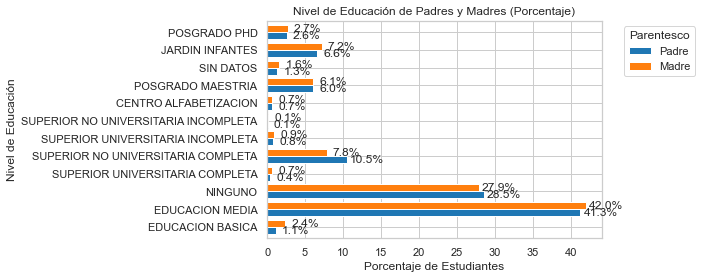

In [123]:
# Contar el número de registros para cada nivel de educación del padre y la madre en porcentajes
ed_padre_count = df['EdPadre'].value_counts(normalize=True) * 100
ed_madre_count = df['EdMadre'].value_counts(normalize=True) * 100

# Crear un DataFrame con los datos combinados para facilitar la visualización
ed_data = pd.DataFrame({
    'Nivel de Educación': ed_padre_count.index.union(ed_madre_count.index, sort=False),
    'Padre': ed_padre_count,
    'Madre': ed_madre_count
}).fillna(0)

# Crear un gráfico de barras horizontales agrupadas para comparar los niveles de educación de los padres y madres
plt.figure(figsize=(12, 8))
ax = ed_data.set_index('Nivel de Educación').plot(kind='barh', color=['#1f77b4', '#ff7f0e'], width=0.8)
plt.title('Nivel de Educación de Padres y Madres (Porcentaje)')
plt.xlabel('Porcentaje de Estudiantes')
plt.ylabel('Nivel de Educación')
plt.legend(title='Parentesco', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Añadir etiquetas solo para barras con valor mayor a 0
        ax.annotate(f'{width:.1f}%', (width, p.get_y() + p.get_height() / 2), ha='center', va='center', xytext=(20, 0), textcoords='offset points')

plt.show()


<h1>Relaciones</h1>


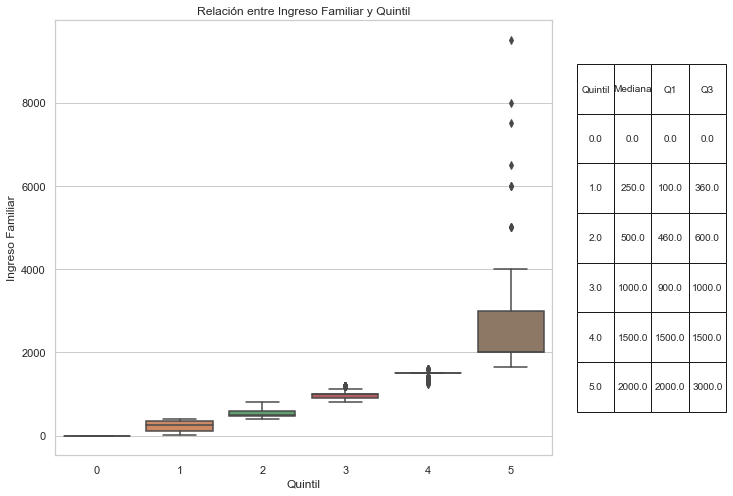

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular estadísticas clave (mediana, Q1, Q3) para cada quintil
quintiles = sorted(df['QUINTIL'].unique())
stats = []
for quintil in quintiles:
    data = df[df['QUINTIL'] == quintil]['decIngresoFam_Ficha']
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    stats.append([quintil, median, q1, q3])

# Convertir a DataFrame para facilitar la visualización
stats_df = pd.DataFrame(stats, columns=['Quintil', 'Mediana', 'Q1', 'Q3'])

# Crear el gráfico de caja
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, x='QUINTIL', y='decIngresoFam_Ficha', ax=ax)
ax.set_title('Relación entre Ingreso Familiar y Quintil')
ax.set_xlabel('Quintil')
ax.set_ylabel('Ingreso Familiar')

# Añadir la tabla con las estadísticas clave
table = plt.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='right', bbox=[1.05, 0.1, 0.3, 0.8])

# Ajustar el tamaño del texto en la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Ajustar el espacio del gráfico para dar cabida a la tabla
plt.subplots_adjust(right=0.7)

# Mostrar el gráfico y la tabla
plt.show()



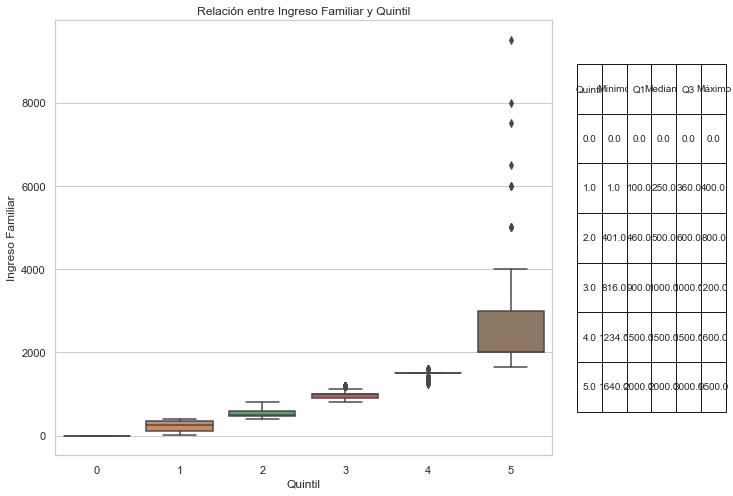

In [138]:

# Calcular estadísticas clave (mínimo, Q1, mediana, Q3, máximo) para cada quintil
quintiles = sorted(df['QUINTIL'].unique())
stats = []
for quintil in quintiles:
    data = df[df['QUINTIL'] == quintil]['decIngresoFam_Ficha']
    minimum = np.min(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    maximum = np.max(data)
    stats.append([quintil, minimum, q1, median, q3, maximum])

# Convertir a DataFrame para facilitar la visualización
stats_df = pd.DataFrame(stats, columns=['Quintil', 'Mínimo', 'Q1', 'Mediana', 'Q3', 'Máximo'])

# Crear el gráfico de caja
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, x='QUINTIL', y='decIngresoFam_Ficha', ax=ax)
ax.set_title('Relación entre Ingreso Familiar y Quintil')
ax.set_xlabel('Quintil')
ax.set_ylabel('Ingreso Familiar')

# Añadir la tabla con las estadísticas clave
table = plt.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='right', bbox=[1.05, 0.1, 0.3, 0.8])

# Ajustar el tamaño del texto en la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Ajustar el espacio del gráfico para dar cabida a la tabla
plt.subplots_adjust(right=0.7)

# Mostrar el gráfico y la tabla
plt.show()


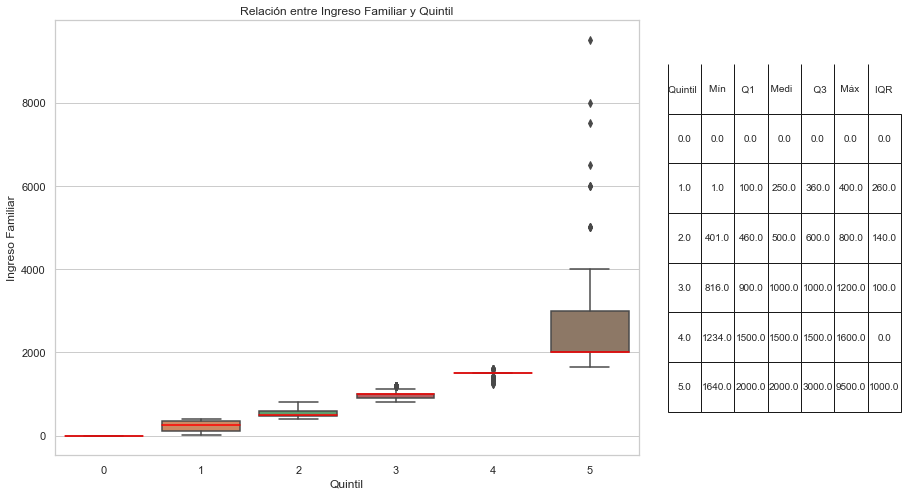

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Suponiendo que ya tienes el DataFrame df cargado

# Calcular estadísticas clave (mínimo, Q1, mediana, Q3, máximo, IQR) para cada quintil
quintiles = sorted(df['QUINTIL'].unique())
stats = []
for quintil in quintiles:
    data = df[df['QUINTIL'] == quintil]['decIngresoFam_Ficha']
    minimum = np.min(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    maximum = np.max(data)
    iqr = q3 - q1  # Calcular el rango intercuartílico
    stats.append([quintil, minimum, q1, median, q3, maximum, iqr])

# Convertir a DataFrame para facilitar la visualización
stats_df = pd.DataFrame(stats, columns=['           Quintil', '            Mín', '          Q1', '          Medi', '              Q3', '           Máx', '            IQR'])


# Crear el gráfico de caja con una línea roja en la mediana
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df, x='QUINTIL', y='decIngresoFam_Ficha', ax=ax, medianprops=dict(color="red"))
ax.set_title('Relación entre Ingreso Familiar y Quintil')
ax.set_xlabel('Quintil')
ax.set_ylabel('Ingreso Familiar')

# Añadir la tabla con las estadísticas clave
table = plt.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='right', bbox=[1.05, 0.1, 0.4, 0.8])

# Ajustar el tamaño del texto en la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Ajustar el ancho de las columnas
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Si es la primera fila (los títulos)
        cell.set_width(0.)  # Ajusta el ancho de las celdas de los títulos

# Ajustar el espacio del gráfico para dar cabida a la tabla
plt.subplots_adjust(right=0.8)

# Mostrar el gráfico y la tabla
plt.show()


<h1>correcion de datos atipicos y agregar nuevas caracteristicas a df</h1>

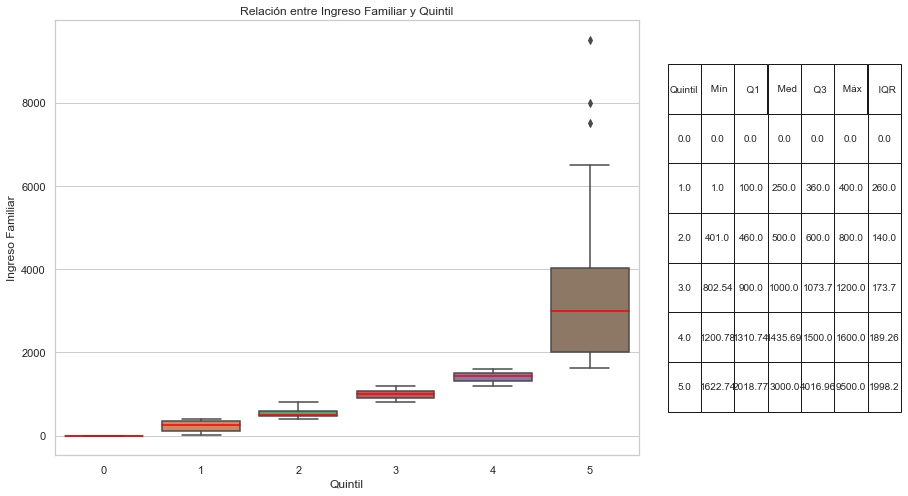

In [181]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame df cargado

# Definir los rangos de ingresos para cada quintil
ranges = {
    3: (800.01, 1200.00),
    4: (1200.01, 1600.00),
    5: (1600.01, 5000.00)  # Ajustar rango superior para ejemplo finito
}

# Función para generar valores aleatorios dentro de los rangos de cada quintil con dos decimales
def generate_random_values(quintil, size):
    low, high = ranges[quintil]
    high = high if high != np.inf else low + 1000  # Generar valores grandes pero finitos
    return np.round(np.random.uniform(low, high, size), 2)

# Generar nuevas filas
new_rows = []
for quintil in ranges:
    incomes = generate_random_values(quintil, 200)
    for income in incomes:
        new_row = {
            'decIngresoFam_Ficha': income,
            'QUINTIL': quintil
        }
        new_rows.append(new_row)

# Convertir las nuevas filas a DataFrame
new_df = pd.DataFrame(new_rows)

# Agregar datos por defecto en las demás columnas
default_values = {
    'intFamiliares_Ficha': 0,
    'strTenenciaVivienda_Ficha': 'SIN DATOS',
    'decIngresoFam_Ficha': 0,
    'decEgresoFam_Ficha': 0,
    'strFinanciaEstudios_Ficha': 'SIN DATOS',
    'strFinanciaEstudios_Ficha.1': 'SIN DATOS',
    'EdPadre': 'SIN DATOS',
    'OcupaPadre': 'SIN DATOS',
    'EdMadre': 'SIN DATOS',
    'OcupaMadre': 'SIN DATOS',
    'Ub_Empresa': 'SIN DATOS',
    'strPolitica_Ficha': 'SIN DATOS',
    'strNombre_col': 'SIN DATOS',
    'strSostenimiento_col': 'SIN DATOS',
    'strSBLuz_Ficha': 'SIN DATOS',
    'strSBAgua_Ficha': 'SIN DATOS',
    'strSBAlcatarillado_Ficha': 'SIN DATOS',
    'strSBInternet_Ficha': 'SIN DATOS',
    'strSBCable_Ficha': 'SIN DATOS',
    'strPC_Ficha': 'SIN DATOS',
    'strTablet_Ficha': 'SIN DATOS',
    'strLaptop_Ficha': 'SIN DATOS',
    'strCellPhone_Ficha': 'SIN DATOS',
    'strOtraCarrera_Ficha': 'SIN DATOS',
    'dtFecha_log': '2022-01-01'
}

for column in df.columns:
    if column not in new_df.columns:
        new_df[column] = default_values.get(column, 'default_value')

# Concatenar el nuevo DataFrame con el original
df_extended = pd.concat([df, new_df], ignore_index=True)

# Mostrar la estructura del nuevo DataFrame
#df_extended.info()

# Crear el gráfico de caja con una línea roja en la mediana
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_extended, x='QUINTIL', y='decIngresoFam_Ficha', ax=ax, medianprops=dict(color="red"))
ax.set_title('Relación entre Ingreso Familiar y Quintil')
ax.set_xlabel('Quintil')
ax.set_ylabel('Ingreso Familiar')

# Calcular estadísticas clave (mínimo, Q1, mediana, Q3, máximo, IQR) para cada quintil
quintiles = sorted(df_extended['QUINTIL'].unique())
stats = []
for quintil in quintiles:
    data = df_extended[df_extended['QUINTIL'] == quintil]['decIngresoFam_Ficha']
    minimum = np.min(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    maximum = np.max(data)
    iqr = q3 - q1  # Calcular el rango intercuartílico
    stats.append([quintil, minimum, q1, median, q3, maximum, iqr])

# Convertir a DataFrame para facilitar la visualización
stats_df = pd.DataFrame(stats, columns=['Quintil', ' Mín', '  Q1', '  Med', '  Q3', ' Máx', '  IQR'])



# Redondear los valores del DataFrame a dos decimales
stats_df = stats_df.round(2)

# Añadir la tabla con las estadísticas clave
table = plt.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc='center', loc='right', bbox=[1.05, 0.1, 0.4, 0.8])

# Ajustar el tamaño del texto en la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Ajustar el ancho de las columnas
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Si es la primera fila (los títulos)
        cell.set_width(0.17)  # Ajusta el ancho de las celdas de los títulos

# Ajustar el espacio del gráfico para dar cabida a la tabla
plt.subplots_adjust(right=0.8)

# Mostrar el gráfico y la tabla
plt.show()


<h1>Dataset Final</h1>

In [187]:
print (df.shape)
print (df_extended.shape)


# Guardar el DataFrame en un archivo CSV en la carpeta "Documentos"
ruta_documentos = os.path.expanduser('~/Documents/datasetfinal_v1.csv')
df.to_csv(ruta_documentos, index=False)

print(f"Archivo guardado en: {ruta_documentos}")

(9160, 28)
(9760, 28)
Archivo guardado en: C:\Users\Administrador/Documents/datasetfinal_v1.csv
